# Hierarchical Cluster Analysis (HCA)

## Introduction

Hierarchical Cluster Analysis (HCA) is a method for grouping similar objects into clusters based on their similarity. Unlike flat clustering methods like k-means, HCA creates a hierarchy of nested clusters that can be visualized using a dendrogram.

There are two main types of hierarchical clustering:

1. **Agglomerative (bottom-up)**: Each data point starts as its own cluster, and clusters are merged iteratively.
2. **Divisive (top-down)**: All data points start in one cluster, and clusters are split iteratively.

### Applications of HCA
HCA is widely used in various fields manily for trend analysis, including:
- **Bioinformatics & Genomics**: Identifying gene expression patterns and evolutionary relationships.
- **Market Segmentation**: Grouping customers based on purchasing behavior.
- **Image Processing**: Clustering pixels with similar attributes for object recognition.
- **Environmental Science**: Categorizing chemical pollutants based on their similarities.
- **Social Sciences**: Analyzing survey responses to detect behavioral patterns.

Here we are going to focuse on the agglomerative approach as it is the most commonly used approach for HCA implementation. 

### Steps of HCA
1. Compute the pairwise distances between all points.
2. Identify the two closest clusters and merge them.
3. Update the distance matrix.
4. Repeat steps 2 and 3 until all points are in one cluster.
5. Represent the results using a **dendrogram**.

## How 

To be able to go through different steps of HCA algorithm we first need to generate some synthetic data that we can use. Please note that the generated dataset is one dimensional for ease of explanation and visualization. The same approach can be expanded to multiple dimensions.

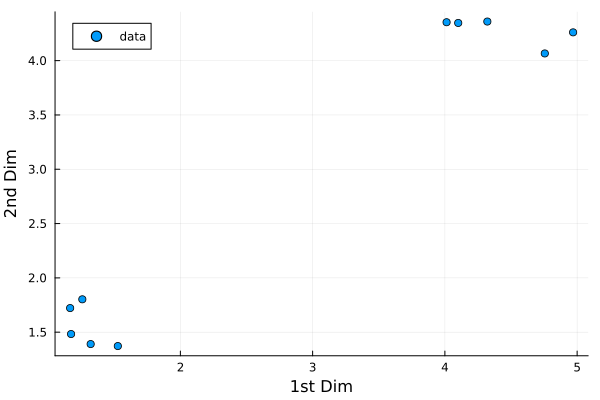

In [4]:
using ACS

ACS.Random.seed!(42)
X = vcat(rand(5, 2) .+ 1, rand(5, 2) .+ 4)  # Two distinct clusters
scatter(X[:,1],X[:,2],label="data")
xlabel!("1st Dim")
ylabel!("2nd Dim")

Let's ignore the second dimension of *X* for the moment and only focus on the 1st dimension. 

In [5]:
X1 = X[:,1];

As we are using working with the agglomerative approach, we start with assuming that all the data points are individual clusters. So in this case we have 10 starting clusters. 

### Step 1: pair-wise distance calculations 

In unidimensional space the distance between two datapoints are defined by the below equation: 

$ 
d_{m,n} = x_n - x_m \\
m,n \in \mathbb{N}^+ \\
n \geq m
$


### E1: 

Let's write a function to calculate 1D distances between all the points in the *X1*.

In [ ]:
function dist(data)
    d = zeros(size(data,1),size(data,1)) #initialize distance matrix
    for i in 1:size(data,1) #loop over all data points
        for j in 1:size(data,1) #loop over all data points
            d[i,j] = abs(data[i]-data[j]) #calculate absolute distance
        end
    end
    return d    

end 

d = dist(X1)

10×10 Matrix{Float64}:
 0.0         0.148087   0.0850109  …  3.79594   2.83932    3.58193
 0.148087    0.0        0.0630761     3.64785   2.69124    3.43384
 0.0850109   0.0630761  0.0           3.71093   2.75431    3.49692
 0.00713593  0.155223   0.0921468     3.80308   2.84646    3.58906
 0.35344     0.205353   0.26843       3.4425    2.48588    3.22849
 2.92726     2.77917    2.84225    …  0.86868   0.0879363  0.654668
 3.14749     2.9994     3.06248       0.648449  0.308167   0.434437
 3.79594     3.64785    3.71093       0.0       0.956617   0.214012
 2.83932     2.69124    2.75431       0.956617  0.0        0.742604
 3.58193     3.43384    3.49692       0.214012  0.742604   0.0

### E2: 

Why do we get a square matrix?

> Answer to E2
> 
> The square matrix is the result of pair-wise distance calculations as you calculate the distances for all possible combinations of indices. The diagonal is zero as the distance of each point with itslef is zero. 


### E3: 

How do we form the first cluster? 

> Answer to E3:
>
> The smallest distances that is not on the diagonal gives you the coordinates of the first cluster. To do these calculations, you can first replace the diagonal with *Inf*, enabling you to search for the smallest non-

In [ ]:
"""
# Hierarchical Cluster Analysis (HCA)

## Introduction
Hierarchical Cluster Analysis (HCA) is a method for grouping similar objects into clusters.
Unlike flat clustering (e.g., k-means), HCA builds a hierarchy of clusters.
There are two main types of hierarchical clustering:

1. **Agglomerative (bottom-up)**: Each data point starts as its own cluster, and clusters are merged iteratively.
2. **Divisive (top-down)**: All data points start in one cluster, and clusters are split iteratively.

This notebook will focus on agglomerative clustering using the **average linkage** method.

## Steps of HCA
1. Compute the pairwise distances between all points.
2. Identify the two closest clusters and merge them.
3. Update the distance matrix.
4. Repeat steps 2 and 3 until all points are in one cluster.
5. Represent the results using a **dendrogram**.
"""

using Random, Clustering, Distances, Plots

"""
## 1. Generating Data
We generate two distinct clusters of data points to illustrate HCA.
"""

Random.seed!(42)
X = vcat(rand(5, 2) .+ 1, rand(5, 2) .+ 4)  # Two distinct clusters

"""
## 2. Computing Pairwise Distances
HCA relies on a distance matrix that quantifies the similarity between points.
We use **Euclidean distance** to measure the distance between data points.
"""

dist_matrix = pairwise(Euclidean(), X', dims=2)

display(dist_matrix)  # Show distance matrix

"""
## 3. Performing Hierarchical Clustering
We use **average linkage**, which calculates the average distance between elements in different clusters.
Other linkage methods include:
- **Single linkage**: Distance between the closest points of two clusters.
- **Complete linkage**: Distance between the farthest points of two clusters.
- **Centroid linkage**: Distance between the centroids of two clusters.
"""

linkage = hclust(dist_matrix, linkage=:average)

"""
## 4. Visualizing the Dendrogram
A dendrogram represents the hierarchical structure of clusters.
By cutting the dendrogram at a specific height, we can choose the number of clusters.
"""

plot(linkage, xticks=1:size(X,1), title="Hierarchical Clustering Dendrogram", xlabel="Data Points", ylabel="Distance")

"""
## 5. Additional Examples
To further explore HCA, we generate different datasets and apply hierarchical clustering using various linkage methods.
"""

# Example 1: Clustering a new dataset with different distributions
Random.seed!(100)
Y = vcat(randn(5, 2) .+ 3, randn(5, 2) .- 3)
dist_matrix_Y = pairwise(Euclidean(), Y', dims=2)
linkage_Y = hclust(dist_matrix_Y, linkage=:single)
plot(linkage_Y, xticks=1:size(Y,1), title="HCA with Single Linkage", xlabel="Data Points", ylabel="Distance")

# Example 2: Applying HCA to a more complex dataset
Z = rand(15, 2) * 10
dist_matrix_Z = pairwise(Euclidean(), Z', dims=2)
linkage_Z = hclust(dist_matrix_Z, linkage=:complete)
plot(linkage_Z, xticks=1:size(Z,1), title="HCA with Complete Linkage", xlabel="Data Points", ylabel="Distance")

"""
## 6. Exercises
Try the following exercises to reinforce your understanding of hierarchical clustering.

### Exercise 1: Implement Custom Clustering Function
Modify the function to test different linkage methods (e.g., `:single`, `:complete`, `:ward`).

### Exercise 2: Generate a Larger Dataset
Create a dataset with 50 points and apply hierarchical clustering. Visualize the results.

### Exercise 3: Experiment with Different Distance Metrics
Modify the distance metric to use **Manhattan** distance instead of Euclidean. Compare the dendrograms.

### Exercise 4: Cut the Dendrogram at a Fixed Height
Write a function to extract cluster assignments by cutting the dendrogram at a predefined distance threshold.
"""

# Solutions

"""
## Solution to Exercise 1
Modify the function to allow different linkage methods.
"""

function hierarchical_clustering(points, method=:average)
    return hclust(pairwise(Euclidean(), points', dims=2), linkage=method)
end

# Example usage
dendrogram = hierarchical_clustering(X, :complete)
plot(dendrogram)

"""
## Solution to Exercise 2
Generate a larger dataset and apply clustering.
"""

Random.seed!(123)
large_X = rand(50, 2) * 10
dist_large = pairwise(Euclidean(), large_X', dims=2)
linkage_large = hclust(dist_large, linkage=:average)
plot(linkage_large, xticks=1:size(large_X,1), title="HCA on Large Dataset", xlabel="Data Points", ylabel="Distance")

"""
## Solution to Exercise 3
Use Manhattan distance instead of Euclidean.
"""

dist_manhattan = pairwise(Cityblock(), X', dims=2)
linkage_manhattan = hclust(dist_manhattan, linkage=:average)
plot(linkage_manhattan, xticks=1:size(X,1), title="HCA with Manhattan Distance", xlabel="Data Points", ylabel="Distance")

"""
## Solution to Exercise 4
Extract clusters by cutting the dendrogram at a threshold.
"""

function cut_dendrogram(linkage, threshold)
    return cutree(linkage, h=threshold)
end

clusters = cut_dendrogram(linkage, 1.5)
println("Cluster Assignments:", clusters)
